#  Data Science for Business
  CAGNETTA DAVIDE 732521\
  IMPERIALE MARCO 734486\
  CIAPPONI ALESSANDRO 733433

In [1]:
import pandas as pd
import pylab as plt 
import seaborn as sns
import numpy as np
import math
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
Labor_Market_ds = pd.read_csv('Labor_Market_Data_Cleaning.csv')
Labor_Market_ds.head()

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,YEAR,TIPO,NAZIONE
0,F,49,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,2021,ATTIVATO,ITALIA
1,M,16,"Costruzione di strade, autostrade e piste aero...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,2021,ATTIVATO,ITALIA
2,M,19,Ristorazione con somministrazione,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,2021,ATTIVATO,ITALIA
3,F,36,Ristorazione con somministrazione,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,2021,ATTIVATO,ITALIA
4,M,36,Fabbricazione di altre apparecchiature elettri...,LICENZA ELEMENTARE,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,2021,ATTIVATO,ERITREA


In [3]:
# Groupby to understand the type of the workers'labor 
Labor_Market_ds.groupby('TIPO').TIPO.count()

TIPO
ATTIVATO       622224
CESSATO        232053
PROROGATO      309241
TRASFORMATO    174921
Name: TIPO, dtype: int64

Text(0.5, 1.0, 'Bar Chart of Embarked')

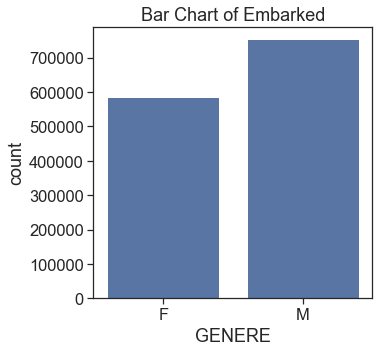

In [4]:
# Grouped boxplot
sns.set(font_scale = 1.50)
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(5, 5))
graph = sns.countplot(x="GENERE", data=Labor_Market_ds, ax=ax, color="b")
graph.set_title('Bar Chart of Embarked')

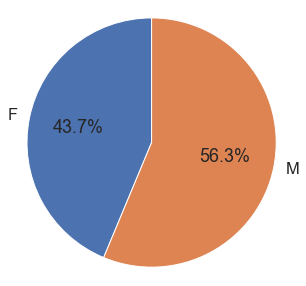

In [5]:
# Piechart creation to understand the variation of workers according to gender
Gender = Labor_Market_ds.groupby('GENERE').GENERE.count()
xaxis = Gender.index
value = Gender.values
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(value, labels=xaxis, autopct='%1.1f%%',  #'autopct' represent the field centre of labels
        shadow=False, startangle=90)
ax1.axis('equal')                                # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

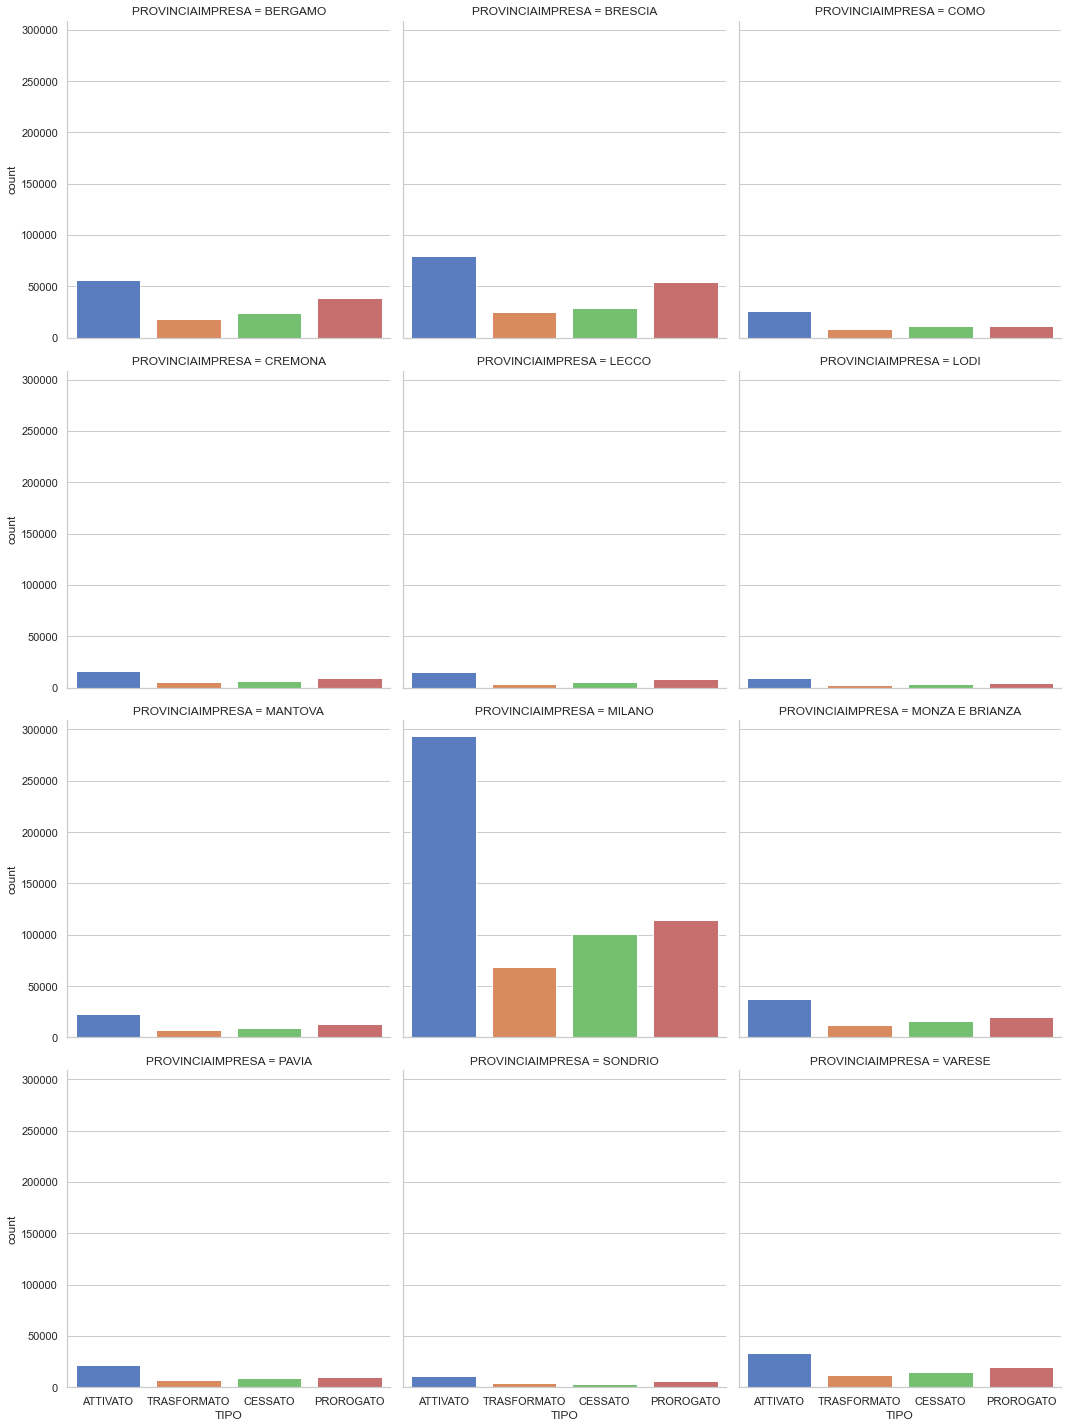

In [6]:
# Barchart creation to understand the type variation of labor in the different provices of Lombardy
sns.set(style="whitegrid")
g = sns.catplot(x="TIPO", col="PROVINCIAIMPRESA", kind="count", col_wrap=3, data=Labor_Market_ds.sort_values(by='PROVINCIAIMPRESA'), palette="muted")

In [7]:
# Groupby on provices to see the variation of the labor market
Labor_Market_ds.groupby('PROVINCIAIMPRESA').PROVINCIAIMPRESA.count()

PROVINCIAIMPRESA
BERGAMO            136137
BRESCIA            187229
COMO                57955
CREMONA             36556
LECCO               33367
LODI                19996
MANTOVA             51590
MILANO             577997
MONZA E BRIANZA     84463
PAVIA               48222
SONDRIO             25526
VARESE              79401
Name: PROVINCIAIMPRESA, dtype: int64

In [8]:
# Groupby on workers' nationality
Labor_Market_ds.groupby('NAZIONE').NAZIONE.count()

NAZIONE
AFGHANISTAN      705
ALBANIA        26026
ALGERIA          791
ANDORRA            1
ANGOLA            73
               ...  
VENEZUELA       1022
VIETNAM           43
YEMEN              9
ZAMBIA             5
ZIMBABWE          18
Name: NAZIONE, Length: 186, dtype: int64

In [9]:
# Creation of a small dataset containing 2 main provinces 
Tre_Province = Labor_Market_ds[(Labor_Market_ds['PROVINCIAIMPRESA'] == 'MILANO')|
                               (Labor_Market_ds['PROVINCIAIMPRESA'] == 'SONDRIO')]
Tre_Province = Tre_Province.reset_index(drop=True)
Tre_Province.groupby('PROVINCIAIMPRESA').PROVINCIAIMPRESA.count()

PROVINCIAIMPRESA
MILANO     577997
SONDRIO     25526
Name: PROVINCIAIMPRESA, dtype: int64

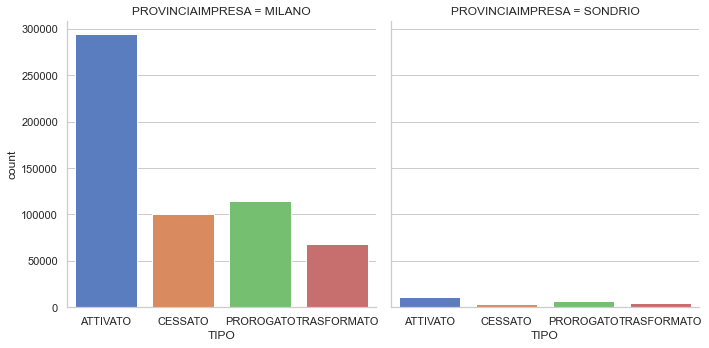

In [10]:
# Barchart creation to understand the type variation of labor in the provices of MIlano and Sondrio
sns.set(style="whitegrid")
g = sns.catplot(x="TIPO", col="PROVINCIAIMPRESA", kind="count", data=Tre_Province, palette="muted")

# Milano

TIPO
ATTIVATO       294066
CESSATO        100985
PROROGATO      114302
TRASFORMATO     68644
Name: TIPO, dtype: int64

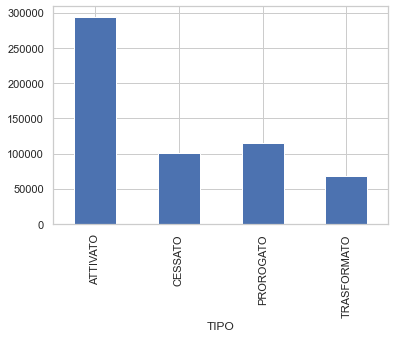

In [11]:
# Barchart creation to understand the different types of work in Milano
Milano = Tre_Province[(Tre_Province['PROVINCIAIMPRESA'] == 'MILANO')]
Milano_Tipo = Milano.groupby('TIPO').TIPO.count()
xaxis = Milano_Tipo.index
value = Milano_Tipo.values
ax = Milano_Tipo.plot.bar(x=xaxis, y=value)
Milano_Tipo

In [12]:
# Groupby on workers' study titles in Milano > 1000 
Study = Milano.groupby('TITOLOSTUDIO').TITOLOSTUDIO.count()
Study = Study[Study.values > 1000]
Study

TITOLOSTUDIO
DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE PERMETTE L'ACCESSO ALL'UNIVERSITA                                          165389
DIPLOMA DI SPECIALIZZAZIONE                                                                                                  2686
DIPLOMA UNIVERSITARIO                                                                                                        5418
LAUREA - Vecchio o nuovo ordinamento                                                                                        83233
LICENZA ELEMENTARE                                                                                                           4470
LICENZA MEDIA                                                                                                              121041
MASTER UNIVERSITARIO DI PRIMO LIVELLO                                                                                        1804
NESSUN TITOLO DI STUDIO                                                      

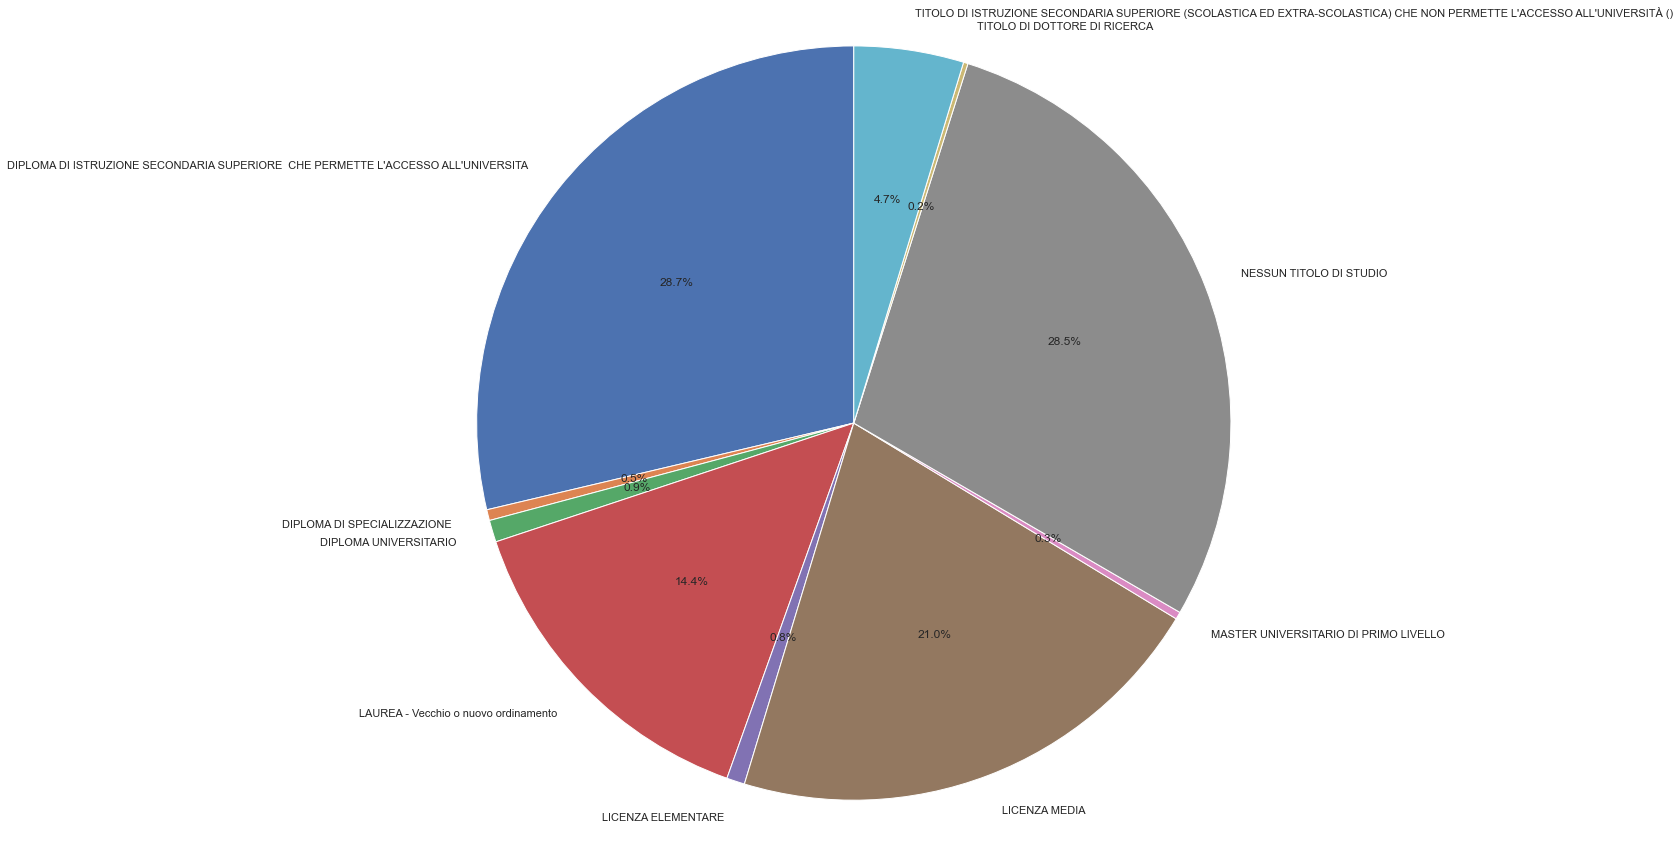

In [13]:
# Piechart creation to understand the variation of workers according to study
xaxis = Study.index
value = Study.values
fig1, ax1 = plt.subplots(figsize=(15,15))
ax1.pie(value, labels=xaxis, autopct='%1.1f%%',  #'autopct' represent the field centre of labels
        shadow=False, startangle=90)
ax1.axis('equal')                                # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [14]:
# Groupby on workers' contracts in Milano > 1000  
Contract = Milano.groupby('CONTRATTO').CONTRATTO.count()
Contract = Contract[Contract.values > 1000]
Contract

CONTRATTO
APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE     13495
COLLABORAZIONE COORDINATA E CONTINUATIVA                      21079
LAVORO A TEMPO DETERMINATO                                   326297
LAVORO A TEMPO DETERMINATO  PER SOSTITUZIONE                  16500
LAVORO A TEMPO INDETERMINATO                                 101243
LAVORO AUTONOMO NELLO SPETTACOLO                              22905
LAVORO DOMESTICO                                              19758
LAVORO INTERMITTENTE                                          26316
Lavoro a tempo indeterminato con piattaforma                   4240
TIROCINIO                                                     24019
Name: CONTRATTO, dtype: int64

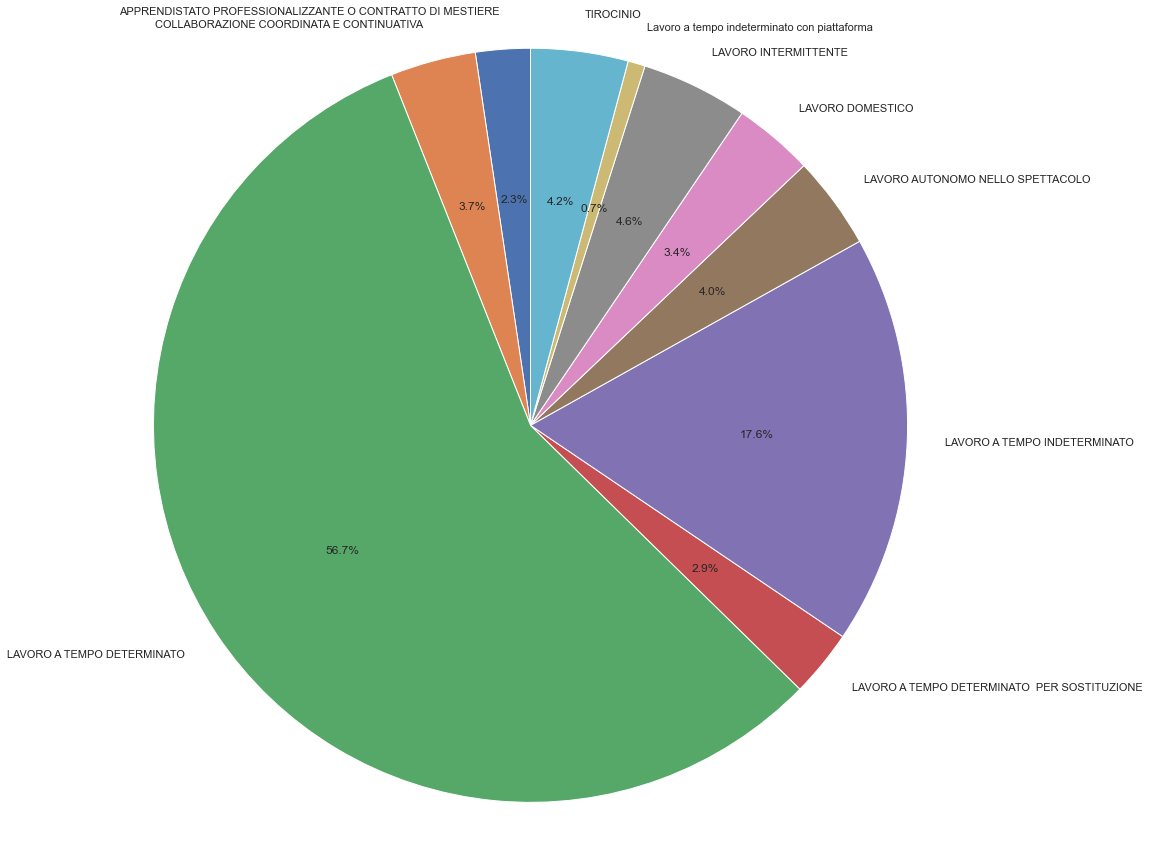

In [15]:
# Piechart creation to understand the variation of workers according to contract
xaxis = Contract.index
value = Contract.values
fig1, ax1 = plt.subplots(figsize=(15,15))
ax1.pie(value, labels=xaxis, autopct='%1.1f%%',  #'autopct' represent the field centre of labels
        shadow=False, startangle=90)
ax1.axis('equal')                                # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Analisys Assumptions and Dismissals

Analysis of hires and layoffs between 2019 and 2021. Data are contined in two different DataSet to combine together with "merge" function.

In [16]:
Assumptions_Milano = pd.read_csv('Lavori_Attivati_Cleaning.csv')
Dismissals_Milano = pd.read_csv('Lavori_Cessati_Cleaning.csv')

In [17]:
# Change Type of DATA and SETTOREECONOMICO columns
Assumptions_Milano = Assumptions_Milano.loc[(Assumptions_Milano['PROVINCIAIMPRESA'] == 'MILANO')]
Assumptions_Milano['DATA'] = pd.to_datetime(Assumptions_Milano['DATA'])
Assumptions_Milano['SETTOREECONOMICO'] = pd.to_numeric(Assumptions_Milano['SETTOREECONOMICO'])

Dismissals_Milano = Dismissals_Milano.loc[(Dismissals_Milano['PROVINCIAIMPRESA'] == 'MILANO')]
Dismissals_Milano['DATA'] = pd.to_datetime(Dismissals_Milano['DATA'])
Dismissals_Milano['SETTOREECONOMICO'] = pd.to_numeric(Dismissals_Milano['SETTOREECONOMICO'])

In [18]:
# Time Interval is selected for Assumptions
interval_year = (Assumptions_Milano['ANNO'] > 2018) & (Assumptions_Milano['ANNO'] <= 2021)
Assumptions_Milano = Assumptions_Milano.loc[interval_year]

In [19]:
# Time Interval is selected for Dismissals
interval_year = (Dismissals_Milano['ANNO'] > 2018) & (Dismissals_Milano['ANNO'] <= 2021)
Dismissals_Milano = Dismissals_Milano.loc[interval_year]

In [20]:
# Reconstruction of the DataSets
Assumptions_Milano = Assumptions_Milano[['DATA', 'SETTOREECONOMICODETTAGLIO', 'SETTOREECONOMICO', 'PROVINCIAIMPRESA', 'TIPO']]
Dismissals_Milano = Dismissals_Milano[['DATA', 'SETTOREECONOMICODETTAGLIO', 'SETTOREECONOMICO', 'PROVINCIAIMPRESA', "TIPO"]]

In [21]:
Assumptions_Milano = Assumptions_Milano.groupby(["SETTOREECONOMICODETTAGLIO","SETTOREECONOMICO"]).count()
Assumptions_Milano

,,DATA,PROVINCIAIMPRESA,TIPO
SETTOREECONOMICODETTAGLIO,SETTOREECONOMICO,,,
Alberghi,0,41210,41210,41210
Altri servizi di supporto alle imprese nca,3,27173,27173,27173
Attività di famiglie e convivenze come datori di lavoro per personale domestico,4,47768,47768,47768
"Attività di produzione cinematografica, di video e di programmi televisivi",1,101335,101335,101335
Commercio al dettaglio di confezioni per adulti,6,30085,30085,30085
Costruzione di edifici residenziali e non residenziali,7,23356,23356,23356
Istruzione secondaria di primo grado: scuole medie,8,22220,22220,22220
Pulizia generale (non specializzata) di edifici,5,37700,37700,37700
Ristorazione con somministrazione,2,49487,49487,49487


In [22]:
Dismissals_Milano = Dismissals_Milano.groupby(["SETTOREECONOMICODETTAGLIO","SETTOREECONOMICO"]).count()
Dismissals_Milano

,,DATA,PROVINCIAIMPRESA,TIPO
SETTOREECONOMICODETTAGLIO,SETTOREECONOMICO,,,
Alberghi,0,5025,5025,5025
Altri servizi di supporto alle imprese nca,3,11846,11846,11846
Attività di famiglie e convivenze come datori di lavoro per personale domestico,4,32101,32101,32101
"Attività di produzione cinematografica, di video e di programmi televisivi",1,1714,1714,1714
Commercio al dettaglio di confezioni per adulti,6,2894,2894,2894
Costruzione di edifici residenziali e non residenziali,7,12738,12738,12738
Istruzione secondaria di primo grado: scuole medie,8,826,826,826
Pulizia generale (non specializzata) di edifici,5,17465,17465,17465
Ristorazione con somministrazione,2,20915,20915,20915


In [23]:
# Join implementation to obtain the Counter values of hired and fired people
Combination = Assumptions_Milano.merge(Dismissals_Milano, on = "SETTOREECONOMICODETTAGLIO", how = "inner")
Combination["ATTIVATO"]= Combination["TIPO_x"]
Combination = Combination.drop(["DATA_x","TIPO_x","PROVINCIAIMPRESA_x"], axis = 1)
Combination["CESSATO"]= Combination["TIPO_y"]
Combination = Combination.drop(["DATA_y","TIPO_y","PROVINCIAIMPRESA_y"], axis = 1)
Combination

,ATTIVATO,CESSATO
SETTOREECONOMICODETTAGLIO,,
Alberghi,41210,5025
Altri servizi di supporto alle imprese nca,27173,11846
Attività di famiglie e convivenze come datori di lavoro per personale domestico,47768,32101
"Attività di produzione cinematografica, di video e di programmi televisivi",101335,1714
Commercio al dettaglio di confezioni per adulti,30085,2894
Costruzione di edifici residenziali e non residenziali,23356,12738
Istruzione secondaria di primo grado: scuole medie,22220,826
Pulizia generale (non specializzata) di edifici,37700,17465
Ristorazione con somministrazione,49487,20915


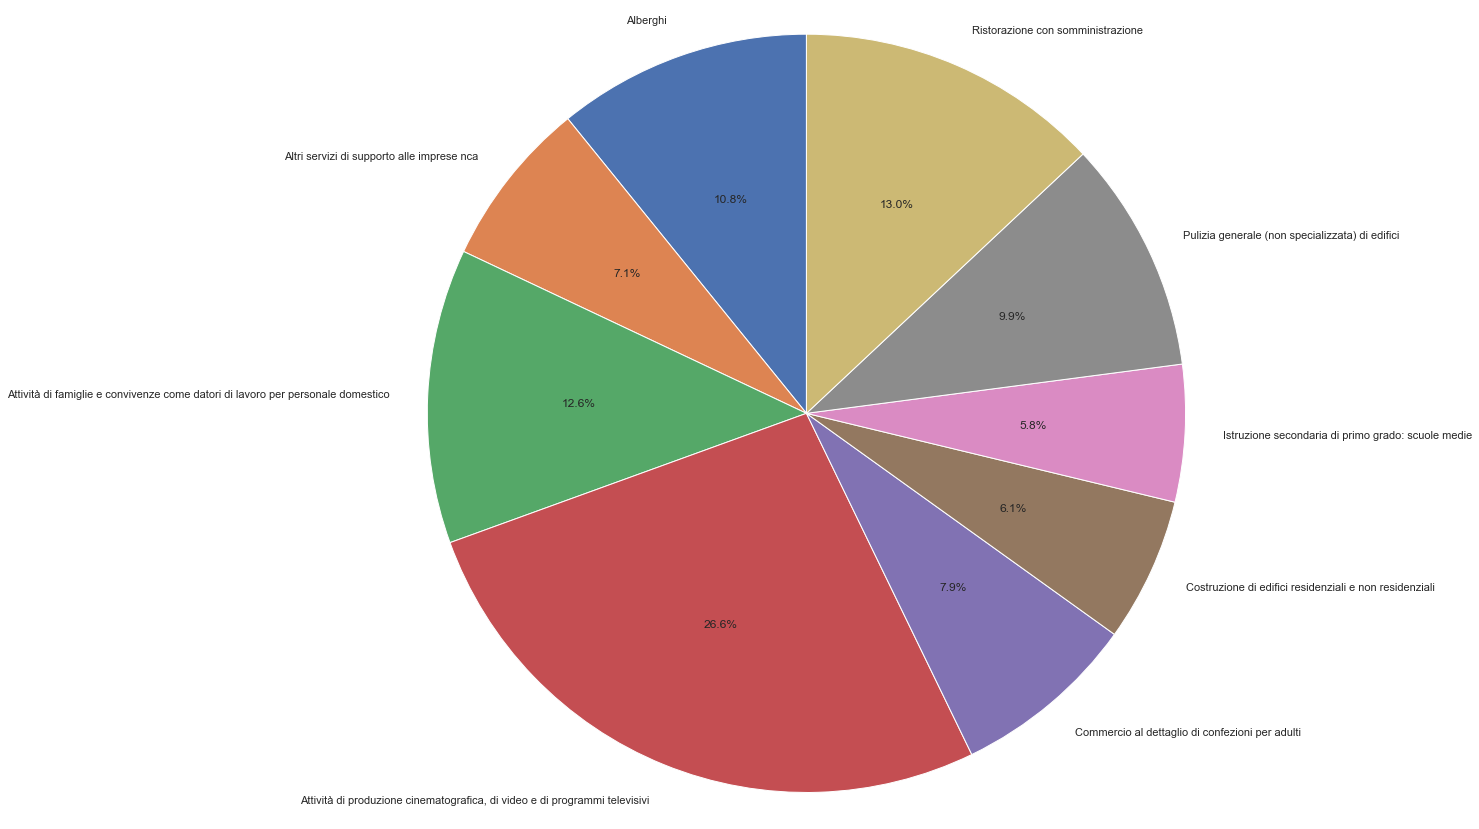

In [24]:
# Piechart creation to understand the variation of workers according to Economic Sector
Sector = Combination.ATTIVATO
xaxis = Sector.index
value = Sector.values
fig1, ax1 = plt.subplots(figsize=(15,15))
ax1.pie(value, labels=xaxis, autopct='%1.1f%%',  #'autopct' represent the field centre of labels
        shadow=False, startangle=90)
ax1.axis('equal')                                # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

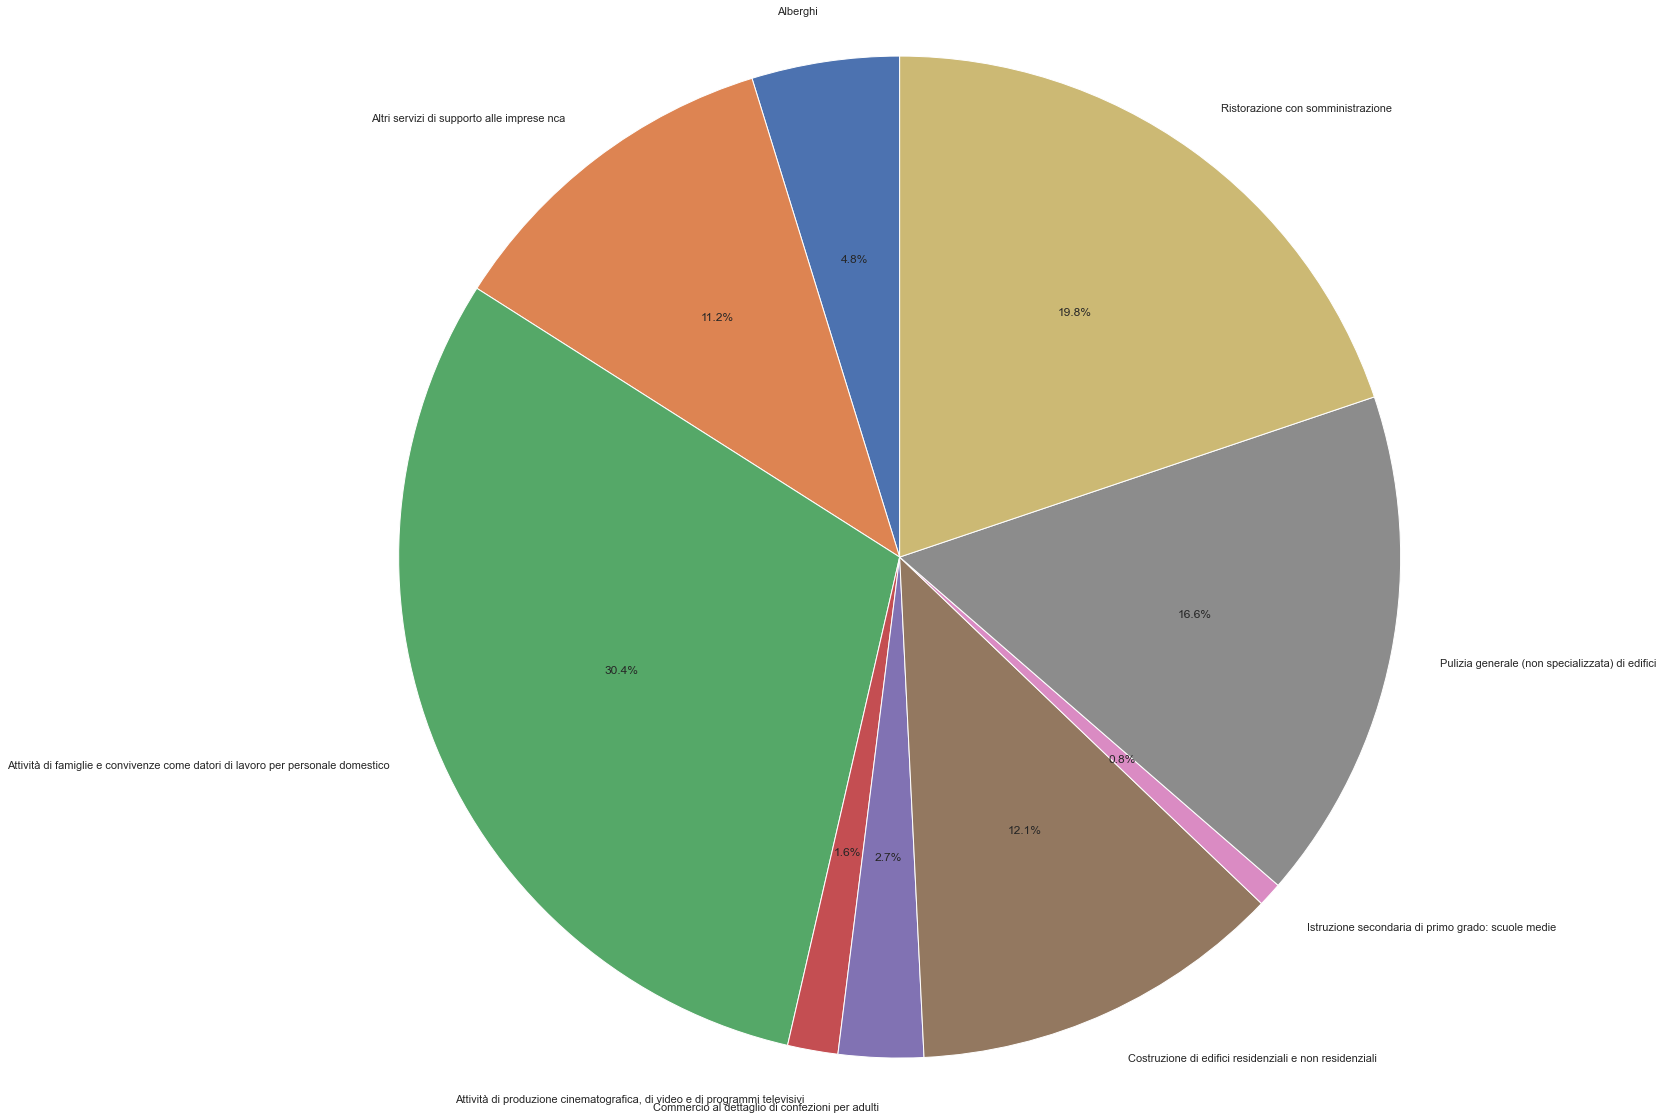

In [25]:
# Piechart creation to understand the variation of workers according to Economic Sector
Sector = Combination.CESSATO
xaxis = Sector.index
value = Sector.values
fig1, ax1 = plt.subplots(figsize=(20,20))
ax1.pie(value, labels=xaxis, autopct='%1.1f%%',  #'autopct' represent the field centre of labels
        shadow=False, startangle=90)
ax1.axis('equal')                                # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Sondrio

TIPO
ATTIVATO       11310
CESSATO         3240
PROROGATO       6393
TRASFORMATO     4583
Name: TIPO, dtype: int64

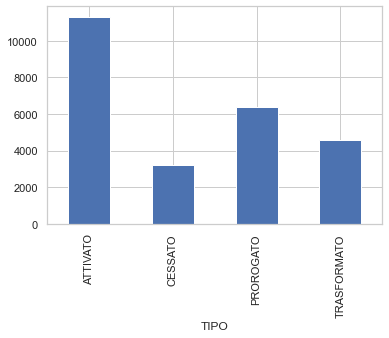

In [26]:
# Barchart creation to understand the different types of work in Sondrio
Sondrio = Tre_Province[(Tre_Province['PROVINCIAIMPRESA'] == 'SONDRIO')]
Sondrio_Tipo = Sondrio.groupby('TIPO').TIPO.count()
xaxis = Sondrio_Tipo.index
value = Sondrio_Tipo.values
ax = Sondrio_Tipo.plot.bar(x=xaxis, y=value)
Sondrio_Tipo

In [27]:
# Groupby on workers' study titles in Sondrio > 1000 
Study = Sondrio.groupby('TITOLOSTUDIO').TITOLOSTUDIO.count()
Study = Study[Study.values > 1000]
Study

TITOLOSTUDIO
DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE PERMETTE L'ACCESSO ALL'UNIVERSITA                                          7317
LAUREA - Vecchio o nuovo ordinamento                                                                                       1693
LICENZA MEDIA                                                                                                              8088
NESSUN TITOLO DI STUDIO                                                                                                    4899
TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCOLASTICA ED EXTRA-SCOLASTICA) CHE NON PERMETTE L'ACCESSO ALL'UNIVERSITÀ ()    3058
Name: TITOLOSTUDIO, dtype: int64

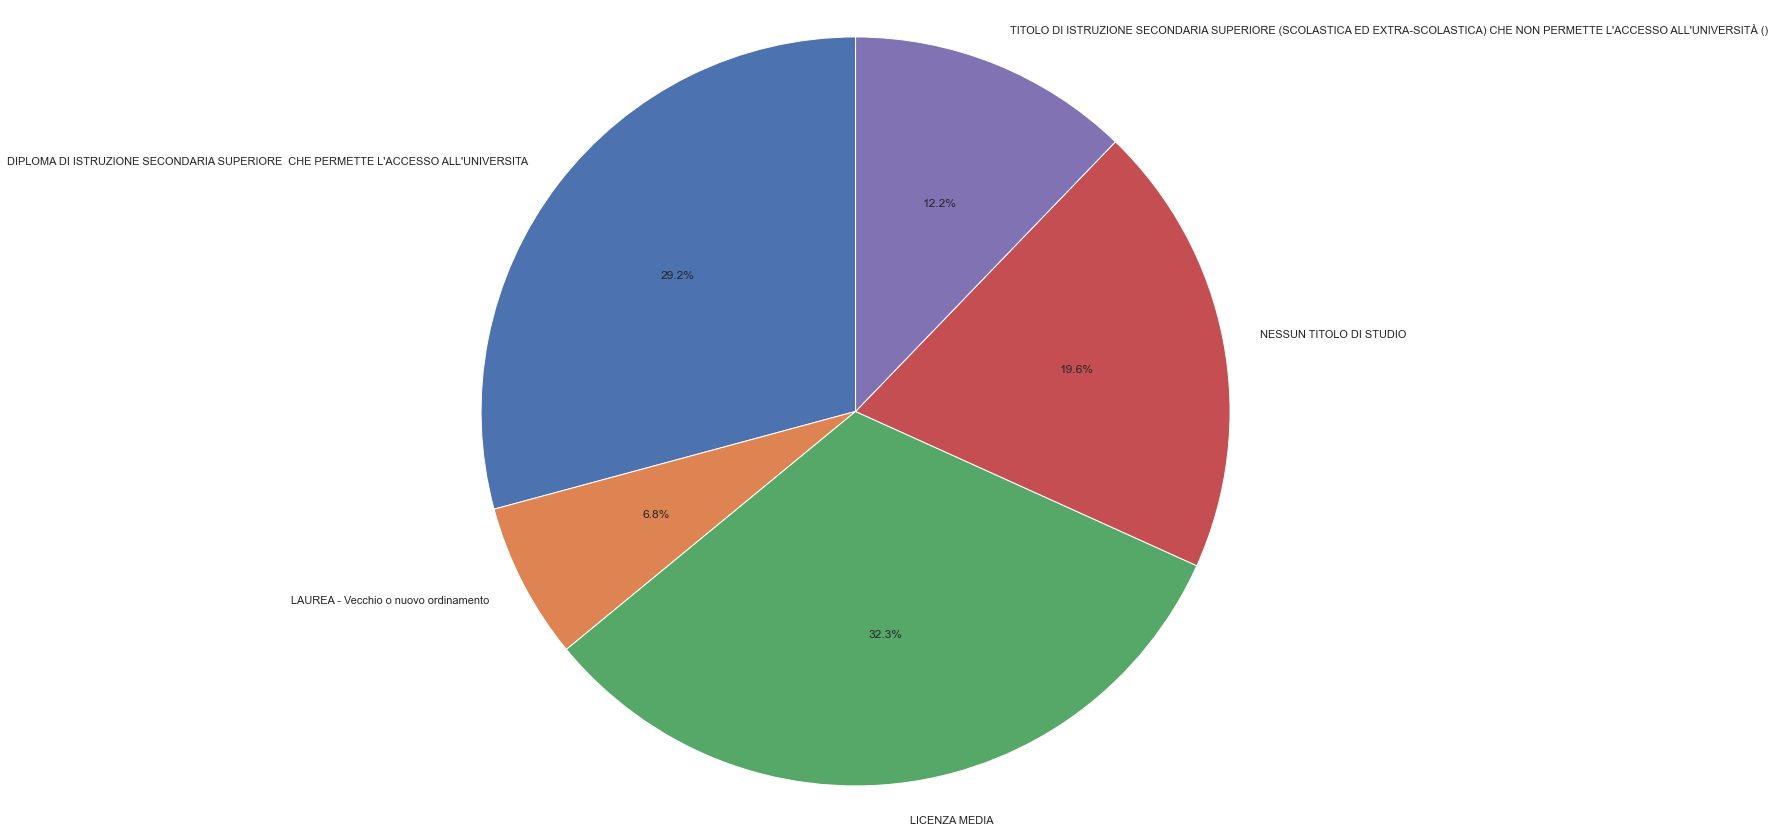

In [28]:
# Piechart creation to understand the variation of workers according to study title
xaxis = Study.index
value = Study.values
fig1, ax1 = plt.subplots(figsize=(15,15))
ax1.pie(value, labels=xaxis, autopct='%1.1f%%',  #'autopct' represent the field centre of labels
        shadow=False, startangle=90)
ax1.axis('equal')                                # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [29]:
# Groupby on workers' contracts in Varese > 1000 
Contract = Sondrio.groupby('CONTRATTO').CONTRATTO.count()
Contract = Contract[Contract.values > 1000]
Contract

CONTRATTO
LAVORO A TEMPO DETERMINATO                      15059
LAVORO A TEMPO DETERMINATO  PER SOSTITUZIONE     1137
LAVORO A TEMPO INDETERMINATO                     2556
LAVORO INTERMITTENTE                             4314
Name: CONTRATTO, dtype: int64

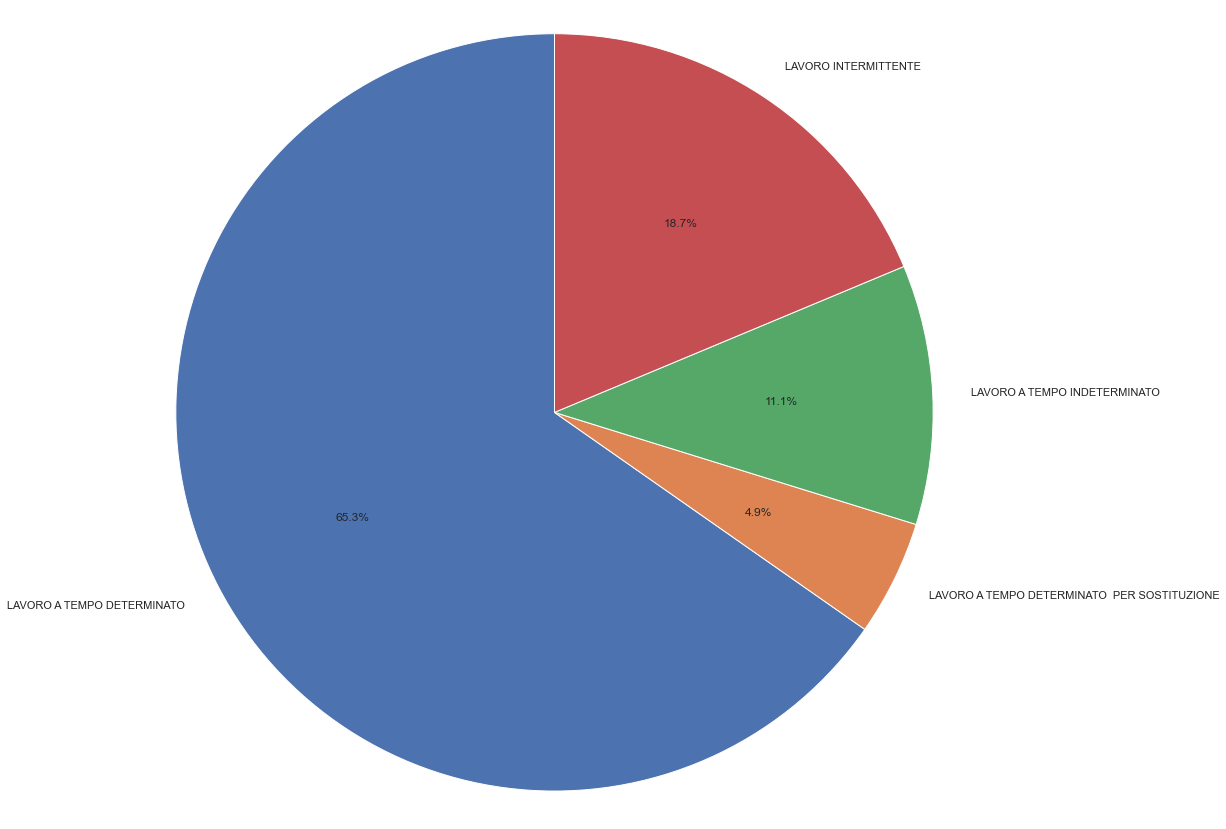

In [30]:
#Piechart creation to understand the variation of workers according to contract
xaxis = Contract.index
value = Contract.values
fig1, ax1 = plt.subplots(figsize=(15,15))
ax1.pie(value, labels=xaxis, autopct='%1.1f%%',  #'autopct' represent the field centre of labels
        shadow=False, startangle=90)
ax1.axis('equal')                                # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Analisys Assumptions and Dismissals

Analysis of hires and layoffs between 2019 and 2021. Data are contined in two different DataSet to combine together with "merge" function.

In [31]:
Assumptions_Milano = pd.read_csv('Lavori_Attivati_Cleaning.csv')
Dismissals_Milano = pd.read_csv('Lavori_Cessati_Cleaning.csv')

In [32]:
# Change Type of DATA and SETTOREECONOMICO columns
Assumptions_Milano = Assumptions_Milano.loc[(Assumptions_Milano['PROVINCIAIMPRESA'] == 'SONDRIO')]
Assumptions_Milano['DATA'] = pd.to_datetime(Assumptions_Milano['DATA'])
Assumptions_Milano['SETTOREECONOMICO'] = pd.to_numeric(Assumptions_Milano['SETTOREECONOMICO'])

Dismissals_Milano = Dismissals_Milano.loc[(Dismissals_Milano['PROVINCIAIMPRESA'] == 'SONDRIO')]
Dismissals_Milano['DATA'] = pd.to_datetime(Dismissals_Milano['DATA'])
Dismissals_Milano['SETTOREECONOMICO'] = pd.to_numeric(Dismissals_Milano['SETTOREECONOMICO'])

In [33]:
# Time Interval is selected for Assumptions
interval_year = (Assumptions_Milano['ANNO'] > 2018) & (Assumptions_Milano['ANNO'] <= 2021)
Assumptions_Milano = Assumptions_Milano.loc[interval_year]

In [34]:
# Time Interval is selected for Dismissals
interval_year = (Dismissals_Milano['ANNO'] > 2018) & (Dismissals_Milano['ANNO'] <= 2021)
Dismissals_Milano = Dismissals_Milano.loc[interval_year]

In [35]:
# Reconstruction of the DataSet
Assumptions_Milano = Assumptions_Milano[['DATA', 'SETTOREECONOMICODETTAGLIO', 'SETTOREECONOMICO', 'PROVINCIAIMPRESA', 'TIPO']]
Dismissals_Milano = Dismissals_Milano[['DATA', 'SETTOREECONOMICODETTAGLIO', 'SETTOREECONOMICO', 'PROVINCIAIMPRESA', "TIPO"]]

In [36]:
Assumptions_Milano = Assumptions_Milano.groupby(["SETTOREECONOMICODETTAGLIO","SETTOREECONOMICO"]).count()
Assumptions_Milano

,,DATA,PROVINCIAIMPRESA,TIPO
SETTOREECONOMICODETTAGLIO,SETTOREECONOMICO,,,
Alberghi,0,4876,4876,4876
Altri servizi di supporto alle imprese nca,3,117,117,117
Attività di famiglie e convivenze come datori di lavoro per personale domestico,4,1075,1075,1075
"Attività di produzione cinematografica, di video e di programmi televisivi",1,4,4,4
Commercio al dettaglio di confezioni per adulti,6,212,212,212
Costruzione di edifici residenziali e non residenziali,7,1364,1364,1364
Istruzione secondaria di primo grado: scuole medie,8,1625,1625,1625
Pulizia generale (non specializzata) di edifici,5,496,496,496
Ristorazione con somministrazione,2,3245,3245,3245


In [37]:
Dismissals_Milano = Dismissals_Milano.groupby(["SETTOREECONOMICODETTAGLIO","SETTOREECONOMICO"]).count()
Dismissals_Milano

,,DATA,PROVINCIAIMPRESA,TIPO
SETTOREECONOMICODETTAGLIO,SETTOREECONOMICO,,,
Alberghi,0,1844,1844,1844
Altri servizi di supporto alle imprese nca,3,131,131,131
Attività di famiglie e convivenze come datori di lavoro per personale domestico,4,812,812,812
Commercio al dettaglio di confezioni per adulti,6,101,101,101
Costruzione di edifici residenziali e non residenziali,7,632,632,632
Istruzione secondaria di primo grado: scuole medie,8,57,57,57
Pulizia generale (non specializzata) di edifici,5,291,291,291
Ristorazione con somministrazione,2,1398,1398,1398


In [38]:
# Join implementation to obtain the Counter values of hired and fired people
Combination = Assumptions_Milano.merge(Dismissals_Milano, on = "SETTOREECONOMICODETTAGLIO", how = "inner")
Combination["ATTIVATO"]= Combination["TIPO_x"]
Combination = Combination.drop(["DATA_x","TIPO_x","PROVINCIAIMPRESA_x"], axis = 1)
Combination["CESSATO"]= Combination["TIPO_y"]
Combination = Combination.drop(["DATA_y","TIPO_y","PROVINCIAIMPRESA_y"], axis = 1)
Combination

,ATTIVATO,CESSATO
SETTOREECONOMICODETTAGLIO,,
Alberghi,4876,1844
Altri servizi di supporto alle imprese nca,117,131
Attività di famiglie e convivenze come datori di lavoro per personale domestico,1075,812
Commercio al dettaglio di confezioni per adulti,212,101
Costruzione di edifici residenziali e non residenziali,1364,632
Istruzione secondaria di primo grado: scuole medie,1625,57
Pulizia generale (non specializzata) di edifici,496,291
Ristorazione con somministrazione,3245,1398


### Assumptions Plot

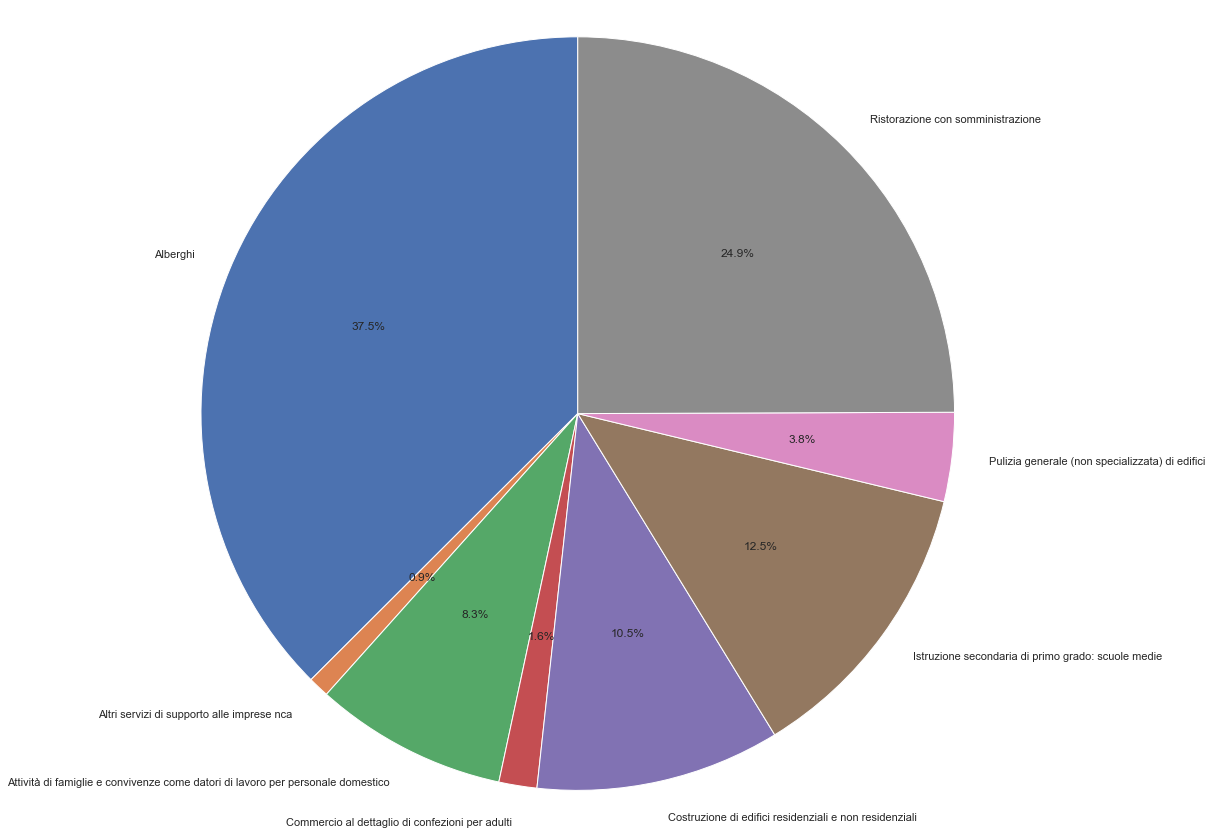

In [39]:
# Piechart creation to understand the variation of workers according to Economic Sector
Sector = Combination.ATTIVATO
xaxis = Sector.index
value = Sector.values
fig1, ax1 = plt.subplots(figsize=(15,15))
ax1.pie(value, labels=xaxis, autopct='%1.1f%%',  #'autopct' represent the field centre of labels
        shadow=False, startangle=90)
ax1.axis('equal')                                # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Dismissals Plot

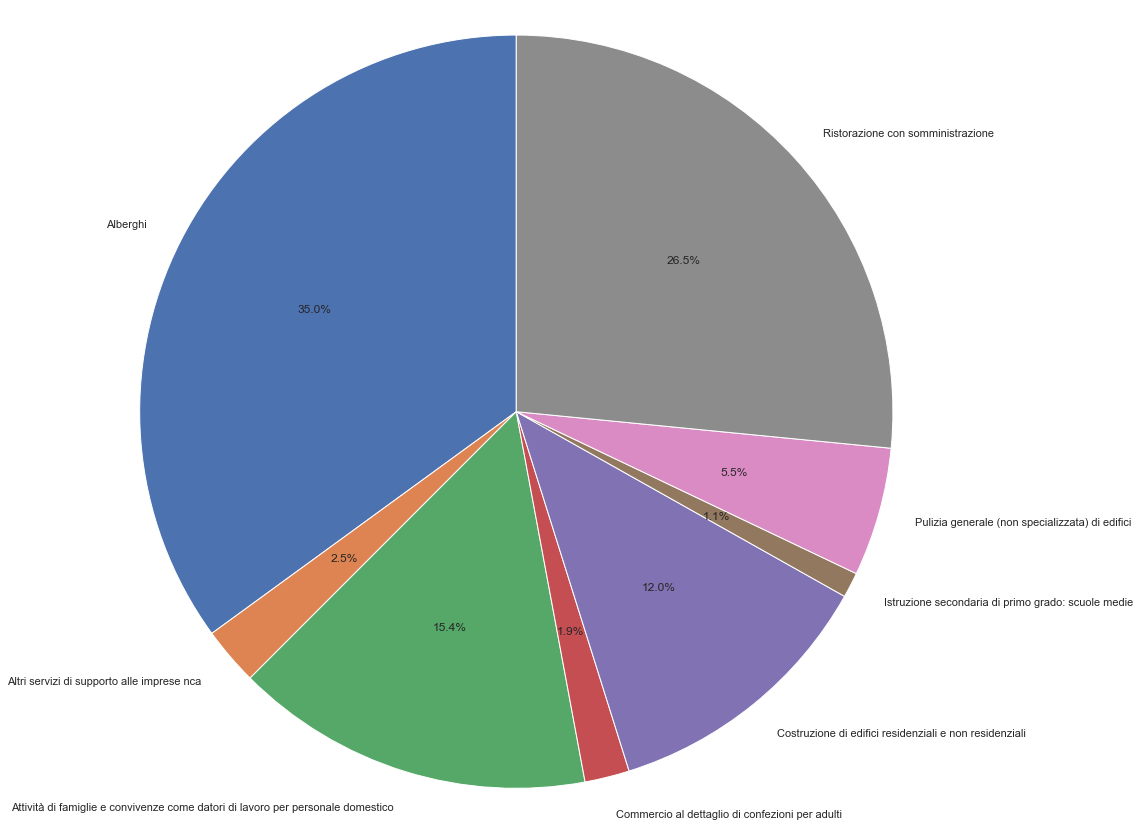

In [40]:
# Piechart creation to understand the variation of workers according to Economic Sector
Sector = Combination.CESSATO
xaxis = Sector.index
value = Sector.values
fig1, ax1 = plt.subplots(figsize=(15,15))
ax1.pie(value, labels=xaxis, autopct='%1.1f%%',  #'autopct' represent the field centre of labels
        shadow=False, startangle=90)
ax1.axis('equal')                                # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()